# Model Training

In this notebook, we will ask you a series of questions regarding model selection. Based on your responses, we will ask you to create the ML models that you've chosen. 

The bonus step is completely optional, but if you provide a sufficient third machine learning model in this project, we will add `1000` points to your Kahoot leaderboard score.

**Note**: Use the dataset that you've created in your previous data transformation step (not the original model).

## Questions
Is this a classification or regression task?  

Classification

Are you predicting for multiple classes or binary classes?  

Binary classes

Given these observations, which 2 (or possibly 3) machine learning models will you choose?  

Logistic Regression, SVM and KNN

## First Model

Using the first model that you've chosen, implement the following steps.

### 1) Create a train-test split

Use your cleaned and transformed dataset to divide your features and labels into training and testing sets. Make sure you’re only using numeric or properly encoded features.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Lasso, Ridge


from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

In [2]:
# import data 
transaction_transformation = pd.read_csv("transformed_transactions.csv")


In [3]:
transaction_transformation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   type                     1000000 non-null  object 
 1   amount                   1000000 non-null  float64
 2   nameOrig                 1000000 non-null  object 
 3   oldbalanceOrg            1000000 non-null  float64
 4   newbalanceOrig           1000000 non-null  float64
 5   nameDest                 1000000 non-null  object 
 6   oldbalanceDest           1000000 non-null  float64
 7   newbalanceDest           1000000 non-null  float64
 8   isFraud                  1000000 non-null  int64  
 9   isFlaggedFraud           1000000 non-null  int64  
 10  isHighAmount             1000000 non-null  bool   
 11  isHighRiskType           1000000 non-null  bool   
 12  highAmount_highRiskType  1000000 non-null  int64  
 13  origin_balance_zeroed    1000000 non-null  

In [4]:
# Drop ID columns
transactions_cleaned = transaction_transformation.drop(columns=['nameOrig', 'nameDest'])

In [5]:
# One-hot encode 'type'
transactions_cleaned = pd.get_dummies(transactions_cleaned, columns=['type'], drop_first=True)

In [6]:
# Then re-define X, y
X = transactions_cleaned.drop(columns=['isFraud'])
y = transactions_cleaned['isFraud']

In [7]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Drop object columns that can't be used
X_train = X_train.drop(columns=['type', 'nameOrig', 'nameDest'], errors='ignore')
X_test = X_test.drop(columns=['type', 'nameOrig', 'nameDest'], errors='ignore')


In [13]:
# train basic linear regression 
lin_model = LinearRegression()
lin_model.fit(X_train, y_train) #this does training

y_pred_lin = lin_model.predict(X_test) #make prdictions on test data  using training model (testing)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Test MSE for linear regression: {mse_lin:.2f}")
print(f"R2 for linear regression: {r2_lin:.2f}") #the higher R2 the better

Test MSE for linear regression: 0.00
R2 for linear regression: 0.19


In [17]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 2) Search for best hyperparameters
Use tools like GridSearchCV, RandomizedSearchCV, or model-specific tuning functions to find the best hyperparameters for your first model.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


param_dist = {
    'alpha': np.linspace(0.01, 10, 100),
    'max_iter': [1000]
}

In [19]:
lasso_model = Lasso()

random_search = RandomizedSearchCV(
    estimator=lasso_model, 
    param_distributions=param_dist,
    n_iter = 1000,
    cv = 5
)

In [20]:

random_search.fit(X_train, y_train)

best_lasso = random_search.best_estimator_

y_pred_lasso = best_lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)


c:\Users\since\anaconda3\downloadpackage\envs\ds\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 100 is smaller than n_iter=1000. Running 100 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\since\anaconda3\downloadpackage\envs\ds\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.372e+02, tolerance: 7.790e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\since\anaconda3\downloadpackage\envs\ds\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.314e+02, tolerance: 7.650e-02
  model = cd_fast.enet_c

KeyboardInterrupt: 

### 3) Train your model
Select the model with best hyperparameters and generate predictions on your test set. Evaluate your models accuracy, precision, recall, and sensitivity.  

In [21]:
# set up possible values for our hyperparameter
param_dist = {
    # choose alpha between 0.01 to 10
    'alpha': np.linspace(0.01, 10, 100),
    'max_iter': [100]
}

In [22]:
# create an instance of the lasso model
lasso_model = Lasso()

In [23]:
# set up hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=lasso_model, 
    param_distributions=param_dist,
    n_iter = 10,
    cv = 5
)

In [24]:
# train our model
random_search.fit(X_train, y_train)

c:\Users\since\anaconda3\downloadpackage\envs\ds\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.661e+02, tolerance: 7.790e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\since\anaconda3\downloadpackage\envs\ds\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.602e+02, tolerance: 7.650e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\since\anaconda3\downloadpackage\envs\ds\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features

RandomizedSearchCV(cv=5, estimator=Lasso(),
                   param_distributions={'alpha': array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.63...
        6.56909091,  6.67      ,  6.77090909,  6.87181818,  6.97272727,
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ]),
                                        'max_iter': [100]})

## Second Model

Create a second machine learning object and rerun steps (2) & (3) on this model. Compare accuracy metrics between these two models. Which handles the class imbalance more effectively?

Create as many code-blocks as needed.

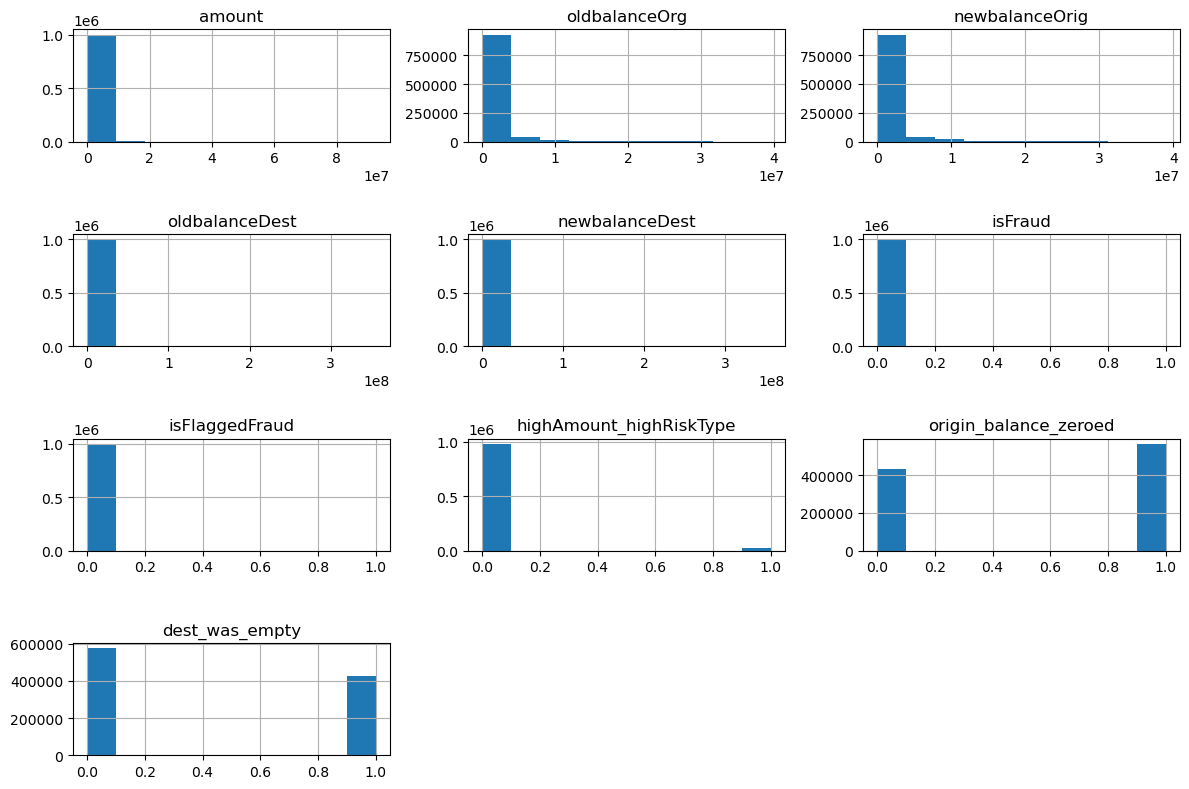

In [25]:
#SVC Model
num_cols = transactions_cleaned.select_dtypes(include=['int64', 'float64']).columns
transaction_transformation[num_cols].hist(figsize=(12,8))
plt.tight_layout()
plt.show()

In [37]:
# select your choice of categorical columns
cat_features = transactions_cleaned.select_dtypes(include=['object']).columns
cat_features

Index([], dtype='object')

In [44]:
cat_features = transaction_transformation.select_dtypes(include=['object']).columns
cat_features = cat_features.drop(["nameOrig", "nameDest"])
cat_features

Index(['type'], dtype='object')

In [39]:

num_features = transactions_cleaned.select_dtypes(include=['int64', 'float64']).columns
num_features

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud',
       'highAmount_highRiskType', 'origin_balance_zeroed', 'dest_was_empty'],
      dtype='object')

In [46]:
X_cat = transaction_transformation[cat_features]
X_num = transaction_transformation[num_features]

In [47]:
X_cat.head()

,type
0,PAYMENT
1,PAYMENT
2,CASH_IN
3,TRANSFER
4,CASH_OUT


In [35]:
X_num.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,highAmount_highRiskType,origin_balance_zeroed,dest_was_empty
0,983.09,36730.24,35747.15,0.00,0.00,0,0,0,0,1
1,55215.25,99414.00,44198.75,0.00,0.00,0,0,0,0,1
2,220986.01,7773074.97,7994060.98,924031.48,703045.48,0,0,0,0,0
3,2357394.75,0.00,0.00,4202580.45,6559975.19,0,0,1,1,0
4,67990.14,0.00,0.00,625317.04,693307.19,0,0,0,1,0


In [48]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
X_cat_full = ohe.fit_transform(X_cat).toarray()

X_cat_full

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(1000000, 5))

In [49]:
ohe.get_feature_names_out(cat_features)

array(['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER'], dtype=object)

In [51]:
cat_names = ohe.get_feature_names_out(cat_features)

encoded_df = pd.DataFrame(X_cat_full, columns=cat_names, index=transaction_transformation.index)

encoded_df.head(5)

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0


In [52]:
X = pd.merge(X_num, encoded_df, left_index=True, right_index=True)

X

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,highAmount_highRiskType,origin_balance_zeroed,dest_was_empty,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,983.09,36730.24,35747.15,0.00,0.00,0,0,0,0,1,0.0,0.0,0.0,1.0,0.0
1,55215.25,99414.00,44198.75,0.00,0.00,0,0,0,0,1,0.0,0.0,0.0,1.0,0.0
2,220986.01,7773074.97,7994060.98,924031.48,703045.48,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
3,2357394.75,0.00,0.00,4202580.45,6559975.19,0,0,1,1,0,0.0,0.0,0.0,0.0,1.0
4,67990.14,0.00,0.00,625317.04,693307.19,0,0,0,1,0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,13606.07,114122.11,100516.04,0.00,0.00,0,0,0,0,1,0.0,0.0,0.0,1.0,0.0
999996,9139.61,0.00,0.00,0.00,0.00,0,0,0,1,1,0.0,0.0,0.0,1.0,0.0
999997,153650.41,50677.00,0.00,0.00,380368.36,0,0,0,1,1,0.0,1.0,0.0,0.0,0.0
999998,163810.52,0.00,0.00,357850.15,521660.67,0,0,0,1,0,0.0,1.0,0.0,0.0,0.0


In [53]:
# select the target
y = transactions_cleaned["isFraud"]

In [54]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

# TODO: perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# initialize LinearSVC with regularization parameter C=1.0 and set max_iter for convergence
lin_svc = LinearSVC(C=1.0, max_iter=10000, random_state=42)

# train the classifier on the dataset
lin_svc.fit(X_train, y_train)

# make predictions on the same dataset
yhat = lin_svc.predict(X_test) 

confusion = confusion_matrix(y_test, yhat)
class_report = classification_report(y_test, yhat)

print("Confusion Matrix \n", confusion)
print("\nClassification Report\n", class_report)

Confusion Matrix 
 [[299580     36]
 [   242    142]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    299616
           1       0.80      0.37      0.51       384

    accuracy                           1.00    300000
   macro avg       0.90      0.68      0.75    300000
weighted avg       1.00      1.00      1.00    300000



In [ ]:
param_grid = {
    'C': np.linspace(0.01, 10, 100),
    'penalty': ['l2'],
    'loss': ['squared_hinge'],
    'dual': [True, False]
}

svc = LinearSVC(max_iter=10000)

# set up RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=1,
)

# fit this model on your training data
random_search.fit(X_train, y_train)

c:\Users\since\anaconda3\downloadpackage\envs\ds\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\since\anaconda3\downloadpackage\envs\ds\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\since\anaconda3\downloadpackage\envs\ds\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\since\anaconda3\downloadpackage\envs\ds\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\since\anaconda3\downloadpackage\envs\ds\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\since\anaco

### (Bonus/Optional) Third Model

Create a third machine learning model and rerun steps (2) & (3) on this model. Which model has the best predictive capabilities? 

Create as many code-blocks as needed.

In [10]:
#Knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

from sklearn.model_selection import train_test_split, GridSearchCV

knn_transactions = KNeighborsClassifier(n_neighbors=3, metric='cityblock')
knn_transactions.fit(X_train, y_train)



KNeighborsClassifier(metric='cityblock', n_neighbors=3)

In [11]:
# Evaluate the classifier on the scaled test data
yhat = knn_transactions.predict(X_test)
accuracy = accuracy_score(y_test, yhat)

print("Testing accuracy on non-scaled data:", accuracy)

Testing accuracy on non-scaled data: 0.999348
